In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
x = df.drop(['species'],axis=1)
y = df['species']

In [5]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [7]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = knn.predict(x_test)

In [9]:
lbs = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=lbs))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, labels=lbs, pos_label=1, average='micro'))

Confusion Matrix:
[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]
Accuracy:  1.0
Precision:  1.0


In [10]:
k_values = list(range(1, 121))
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

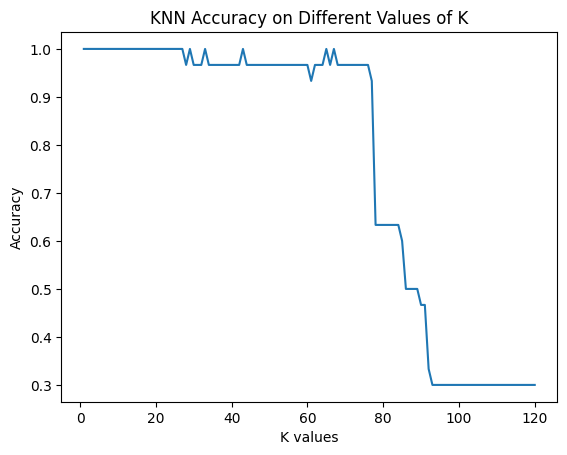

In [11]:
plt.plot(k_values, accuracies)
plt.grid(False)
plt.title('KNN Accuracy on Different Values of K')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()